About Dataset

This dataset appears to contain a variety of features related to text analysis, sentiment analysis, and psychological indicators, likely derived from posts or text data. Some features include readability indices such as Automated Readability Index (ARI), Coleman Liau Index, and Flesch-Kincaid Grade Level, as well as sentiment analysis scores like sentiment compound, negative, neutral, and positive scores. Additionally, there are features related to psychological aspects such as economic stress, isolation, substance use, and domestic stress. The dataset seems to cover a wide range of linguistic, psychological, and behavioural attributes, potentially suitable for analyzing mental health-related topics in online communities or text data.

Benefits of using this dataset:
- Insight into Mental Health: The dataset provides valuable insights into mental health by analyzing linguistic patterns, sentiment, and psychological indicators in text data. Researchers and data scientists can gain a better understanding of how mental health issues manifest in online communication.
- Predictive Modeling: With a wide range of features, including sentiment analysis scores and psychological indicators, the dataset offers opportunities for developing predictive models to identify or predict mental health outcomes based on textual data. This can be useful for early intervention and support.
- Community Engagement: Mental health is a topic of increasing importance, and this dataset can foster community engagement on platforms like Kaggle. Data enthusiasts, researchers, and mental health professionals can collaborate to analyze the data and develop solutions to address mental health challenges.
- Data-driven Insights: By analyzing the dataset, users can uncover correlations and patterns between linguistic features, sentiment, and mental health indicators. These insights can inform interventions, policies, and support systems aimed at promoting mental well-being.
- Educational Resource: The dataset can serve as a valuable educational resource for teaching and learning about mental health analytics, sentiment analysis, and text mining techniques. It provides a real-world dataset for students and practitioners to apply data science skills in a meaningful context.

Aloitamme työskentelemällä Kaggle-sivustolta saatavissa olevan mielenterveysdatan parissa, jonka info löytyy sivustolta. Ensimmäinen askel on datan esikäsittely. Sen jälkeen analysoimme dataa visuaalisesti ja käytämme 3 koneoppimismallia mallintamiseen. Lopuksi teemme yhteenvedon ja esitämme päätelmät.

In [1]:
import pandas as pd
import numpy as np

# poistetaan kaikki tulevaisuudessa tulevien muutosten varoitukset
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
#luodaan dataframe ja ladataan csv-tiedosto siihen (tulostetaan näkyviin tiedoston 5 ensimmäistä riviä)
csv_src = "data/MentalHealthDataset.csv"
df = pd.read_csv(csv_src)
df.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
#df.dtypes

In [4]:
shape = df.shape
print(f"Dataframessa on {shape[0]} riviä ja {shape[1]} saraketta.")

Dataframessa on 292364 riviä ja 17 saraketta.


In [5]:
#katsotaan yleiskatsaus tiedoston sisällöstä
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [6]:
#katsotaan myös, minkä verran on NaN-arvoja
df.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [7]:
#huomaamme, että ainoa, missä on NaN-arvoja, on self-employed, joten käsitellään se seuraavaksi:

#voimme korvata nämä reilu 5000 arvolla 'No'
df['self_employed'] = df['self_employed'].fillna('No')

#poistetaan myös timestamp-sarake
df = df.drop(columns=['Timestamp'])

df.head()


,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [8]:
#df['Gender'].unique() --> male/female
#df['Country'].unique() --> 35kpl
#df['Occupation'].unique() --> corporate/student/business/housewife/others
#df['self_employed'].unique() --> yes/no
#df['family_history'].unique() --> yes/no
#df['treatment'].unique() --> yes/no
#df['Days_Indoors'].unique() --> 1-14d/everyD/2M+/15-30d/31-60d
#df['Growing_Stress'].describe() --> yes/no/maybe
#df['Changes_Habits'].unique() --> yes/no/maybe
#df['Mental_Health_History'].unique() --> yes/no/maybe
#df['Mood_Swings'].unique() --> medium/low/high
#df['Coping_Struggles'].unique() --> no/yes
#df['Work_Interest'].unique() --> yes/no/maybe
#df['Social_Weakness'].unique() --> yes/no/maybe
#df['mental_health_interview'].unique() --> yes/no/maybe
#df['care_options'].unique() --> notsure/yes/no


In [9]:
value_counts=df['Growing_Stress'].value_counts()
value_counts2=df['Changes_Habits'].value_counts()
value_counts3=df['Mental_Health_History'].value_counts()
value_counts4=df['Mood_Swings'].value_counts()
value_counts5=df['Work_Interest'].value_counts()
value_counts6=df['Social_Weakness'].value_counts()
value_counts7=df['mental_health_interview'].value_counts()
value_counts8=df['care_options'].value_counts()

print(value_counts,value_counts2,value_counts3,value_counts4,value_counts5,value_counts6,value_counts7,value_counts8)

Growing_Stress
Maybe    99985
Yes      99653
No       92726
Name: count, dtype: int64 Changes_Habits
Yes      109523
Maybe     95166
No        87675
Name: count, dtype: int64 Mental_Health_History
No       104018
Maybe     95378
Yes       92968
Name: count, dtype: int64 Mood_Swings
Medium    101064
Low        99834
High       91466
Name: count, dtype: int64 Work_Interest
No       105843
Maybe    101185
Yes       85336
Name: count, dtype: int64 Social_Weakness
Maybe    103393
No        97364
Yes       91607
Name: count, dtype: int64 mental_health_interview
No       232166
Maybe     51574
Yes        8624
Name: count, dtype: int64 care_options
No          118886
Yes          95712
Not sure     77766
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

#muunnetaan sarakkeiden arvoja numeraaleiksi,
categorical_columns = ['Gender', 'Occupation', 'self_employed', 'family_history', 
                       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 
                       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 
                       'Social_Weakness', 'mental_health_interview', 'care_options']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,United States,1,0,0,1,0,2,1,2,2,0,1,2,1,1
1,0,United States,1,0,1,1,0,2,1,2,2,0,1,2,1,0
2,0,United States,1,0,1,1,0,2,1,2,2,0,1,2,1,2
3,0,United States,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,United States,1,0,1,1,0,2,1,2,2,0,1,2,1,2


In [11]:
#df.dtypes

Edellä tulostuneeseen head() verrattuna
- sukupuoli määräytyi 0 = female, 1 = male
- self-employed 0 = 'No' (ja 1 = 'Yes')
- family_history 0 = 'No', 1 = 'Yes'
- treatment 1 = 'Yes' ( ja 0 = 'No')
- coping_struggles 0 = 'No' (ja 1 = 'Yes')

Nämä mielessä pitäen lähdetään jatkamaan analysointia

In [14]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

#lasketaan perhehistorian, hoidon saamisen ja hoidon vaihtoehtojen 'yes'-alkiot
df_yes_counts_familyhistory = df[df['family_history'] == 1].groupby('Country').size().reset_index(name='family_yes_sum') 
df_yes_counts_treatments = df[df['treatment'] == 1].groupby('Country').size().reset_index(name='treatment_yes_sum') 
df_yes_counts_care = df[df['care_options'] == 2].groupby('Country').size().reset_index(name='care_yes_sum')
df_yes_counts_self_employ = df[df['self_employed'] == 1].groupby('Country').size().reset_index(name='employ_yes_sum')

#yhdistetään tietoja samaan dataframeen
df_combined = df_yes_counts_familyhistory.merge(df_yes_counts_treatments, on='Country', how='left')
df_combined = df_combined.merge(df_yes_counts_care, on='Country', how='left')
df_combined = df_combined.merge(df_yes_counts_self_employ, on='Country', how='left')

#ladataan kartta ja sijainnit
world = gpd.read_file('data/map/ne_110m_admin_0_countries.shp')
world = world[['ADMIN', 'geometry']]
world = world.rename(columns={"ADMIN": 'Country'})

#sijaintitiedot laskettuihin arvoihin
df_combined = world.merge(df_combined, on='Country', how='left')




In [15]:
from IPython.display import IFrame

#luodaan kartta
m = folium.Map(location=[0,0], zoom_start=2)

#lisätään markercluster
marker_cluster = MarkerCluster().add_to(m)

#lisätään markerit maittain
for idx, row in df_combined.iterrows():
    if pd.notnull(row['family_yes_sum']):
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            popup=(
                f"Country: {row['Country']}<br>"
                f"Family History (Yes): {row['family_yes_sum']}<br>"
                f"Has treatment (Yes): {row['treatment_yes_sum']}<br>"
                f"Care options (Yes): {row['care_yes_sum']}<br>"
                f"Self employed (Yes): {row['employ_yes_sum']}"
            ),
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)
        
#tallennetaan html
my_map = "map.html"
m.save(my_map)

IFrame(my_map, width=800, height=600)
m


Kuten kartasta näkyy, globaalilla sijainnilla on jonkin verran vaikutusta siihen, miten palvelut ovat saatavilla, mutta suuria eroja ei ole havaittavissa. Useimmissa listatuissa maissa "vanhemmilta periytyminen" ja "saatu hoito" -sarakkeiden arvot ovat joko samantasoisia tai "saatu hoito" -sarakkeessa on jopa enemmän alkioita.

Seuraavaksi käytämme Random Forest, Decision Tree ja KNN -koneoppimismalleja mallintamaan, vaikuttaako sukupuoli mielenterveysongelmien esiintymiseen.

In [16]:
from sklearn.preprocessing import MinMaxScaler

#skaalataan valitut sarakkeet välille 0-1, joten ovat vertailukelpoisia keskenään
scaler = MinMaxScaler()

#muunnetaan maa-sarakkeen arvot myös numeraaliksi
country_encoded = LabelEncoder()
df['Country'] = country_encoded.fit_transform(df['Country'].astype(str))


df_scaled = df.copy()

colums_to_scale = ['Country','Gender', 'self_employed', 'family_history',
                   'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
                   'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
                   'Social_Weakness', 'mental_health_interview', 'care_options']

df_scaled[colums_to_scale] = scaler.fit_transform(df[colums_to_scale]).round(2)


In [17]:
from sklearn.model_selection import train_test_split

# Muutetaan 'Gender' luokkamuotoiseksi numeerisilla arvoilla
df_scaled['Gender'] = pd.cut(df['Gender'], bins=2)
df_scaled['Gender'] = pd.factorize(df_scaled['Gender'])[0]

# Valitaan 25% datasta nopeutuksena tätä tehdessä (kommenttiin valmiiseen työhön)
#df_sample = df_scaled.sample(frac=0.25, random_state=42)

#jaetaan aineisto testi- ja opetusdataan, valitaan myös sukupuoli vertausdataksi
X = df_scaled.drop('Gender', axis=1)
y = df_scaled['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#mallintaminen

#Random forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)


#Decision Tree
decision_tree_model = DecisionTreeClassifier(max_depth=7,random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)


#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)




Random Forest - Feature importances:
	Days_Indoors: 0.1468921181856674
	Occupation: 0.13101422084946035
	Work_Interest: 0.0926172286189832
	Changes_Habits: 0.09175592085005883
	Mood_Swings: 0.09102051294009225
	Social_Weakness: 0.08483413693737336
	Mental_Health_History: 0.0773099585510679
	Growing_Stress: 0.0713693488477217
	Country: 0.06649725364274217
	family_history: 0.03367741329068916
	Coping_Struggles: 0.03190728802304033
	treatment: 0.02384993809362807
	care_options: 0.023367907509518504
	mental_health_interview: 0.021259497385276757
	self_employed: 0.012627256274679869


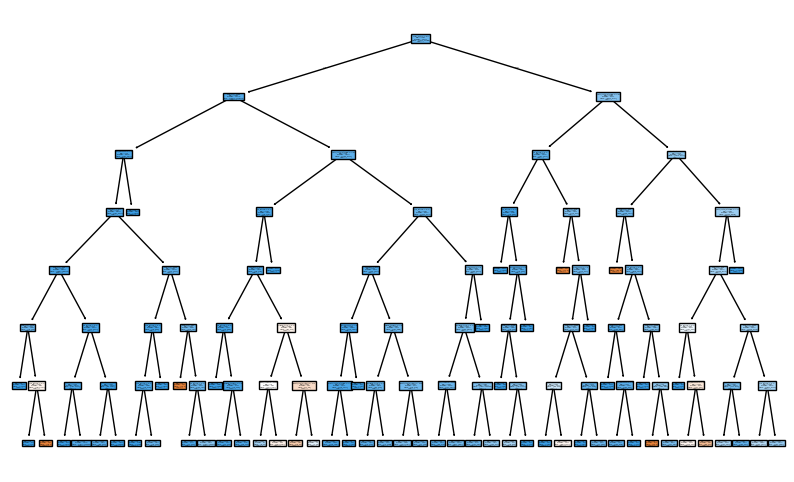

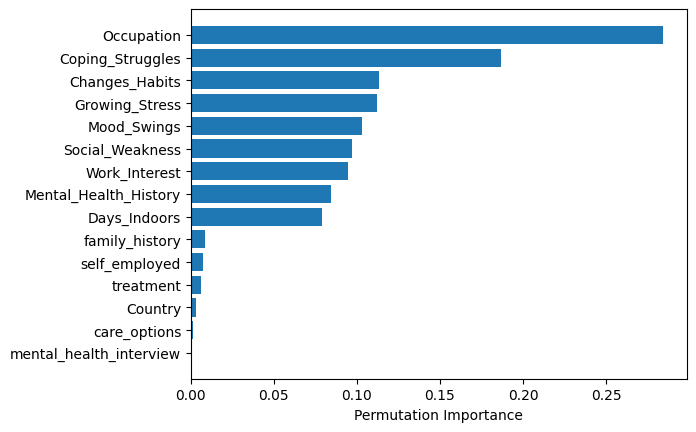

In [19]:
from sklearn.inspection import permutation_importance
from sklearn import tree
import matplotlib.pyplot as plt

#print(y_train.unique())

#Random forest
feature_importances = random_forest_model.feature_importances_
feature_importances_dict = dict(zip(X_train.columns, feature_importances))

sorted_features = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)
print("Random Forest - Feature importances:")
for feature, importance in sorted_features:
    print(f"\t{feature}: {importance}")
    
#Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(decision_tree_model, feature_names=X_train.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()

#KNN
result = permutation_importance(knn_model, X_test, y_test, n_repeats=5, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()


- Days_Indoors:0.1468921181856674
- Occupation:0.13101422084946035
- Work_Interest:0.0926172286189832
- ...

Analysoimalla Random Forest -mallin Feature Importance -arvoja voimme päätellä, että henkilön yhtäjaksoisesti sisätiloissa viettämä aika saattaa olla merkittävin tekijä mielenterveysongelmien osalta.

KNN-malli sen sijaan viittaa siihen, että työtehtävä tai ammatti saattaa olla merkittävin tekijä mielenterveysongelmien korrelaatiolle.

Tämä osoittaa, että eri koneoppimismallit voivat antaa erilaisia näkemyksiä samasta datasetistä, mikä korostaa monipuolisen analyysin tärkeyttä.

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
#tarkkuuslaskennat

#Random Forest
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print("Random forest metrics: \n Accuracy score: ", accuracy_random_forest, '\n Precision score: ', precision_random_forest, '\n Recall score: ', recall_random_forest, '\n F1 score: ', f1_random_forest, '\n Confusion matrix \n', confusion_random_forest)

#Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Decision tree metrics: \n Accuracy score: ", accuracy_decision_tree, '\n Precision score: ', precision_decision_tree, '\n Recall score: ', recall_decision_tree, '\n F1 score: ', f1_decision_tree,'\n Confusion matrix \n', confusion_decision_tree)

#KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN metrics: \n Accuracy score: ", accuracy_knn, '\n Precision score: ', precision_knn, '\n Recall score: ', recall_knn, '\n F1 score: ', f1_knn, '\n Confusion matrix \n', confusion_knn)


Random forest metrics: 
 Accuracy score:  0.9954679937749047 
 Precision score:  0.9948754123529534 
 Recall score:  0.999624765478424 
 F1 score:  0.9972444342771579 
 Confusion matrix 
 [[10256   247]
 [   18 47952]]
Decision tree metrics: 
 Accuracy score:  0.8336668205838592 
 Precision score:  0.8410501533851752 
 Recall score:  0.9830310610798416 
 F1 score:  0.9065149272381245 
 Confusion matrix 
 [[ 1591  8912]
 [  814 47156]]
KNN metrics: 
 Accuracy score:  0.9889008602260873 
 Precision score:  0.9877347405743028 
 Recall score:  0.998874296435272 
 F1 score:  0.9932732869684187 
 Confusion matrix 
 [[ 9908   595]
 [   54 47916]]


Kuten yllä olevista tuloksista näemme, mallinnukset ovat suoriutuneet erinomaisilla tarkkuuksilla. Random Forest -malli saavutti jopa tarkkuuden 0.99, ja KNN-malli ei jäänyt paljon jälkeen, sillä sen tarkkuus oli vain 0.1 yksikköä matalampi. Sekoitusmatriisien tarkastelu osoittaa, että Random Forest -mallilla on vähiten ennustettuja vääriä positiivisia (False Positive) ja vääriä negatiivisia (False Negative) arvoja.

Kaiken kaikkiaan voidaan päätellä, että Random Forest -malli antoi parhaimman suoriutumiskyvyn tässä analyysissä.